**import requests that is a library that allows us to make HTTP requests**

In [16]:
import requests


**Scan the Code Bare of the object to get the information about it using OCR model APIt**

**We will use the Barcode of Coca-cola - 330 mL
 in our example**

In [17]:
import requests
from PIL import Image
image_path = "/content/download.png"
api_url = 'https://api.api-ninjas.com/v1/imagetotext'
image_file_descriptor = open(image_path, 'rb')
im = Image.open(image_path)
files = {'image': image_file_descriptor}
r = requests.post(api_url, files=files, headers={'X-Api-Key': '8ZZrXrgsu0rJOhg2UAcKUg==ZBDYl28BZIlkVkr8'})
print(r.json())


[{'text': '5449000214911', 'bounding_box': {'x1': 68, 'y1': 133, 'x2': 248, 'y2': 148}}]


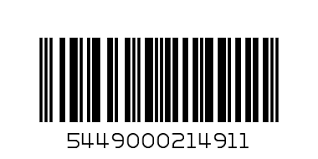

In [18]:
im

**transform the return to valid barcode**

In [19]:
barcode = ''
for i in r.json():
    for key, value in i.items():
        if key == 'text':
            for c in value:
                if c.isdigit():
                    barcode += c
print(barcode)

5449000214911


**Set the ingredient that we have allergy from it**

In [20]:
ingredient = 'sugars'

**Get the information about theobject we whant using the barcode**

In [21]:
r = requests.get("https://world.openfoodfacts.org/api/v0/product/" + barcode)
nutriments = r.json()['product']['nutriments']
check = False
print('{:<20} {:<20}'.format('key', 'value'))
print('{:<20} {:<20}'.format('---', '-----')) 
for key, value in nutriments.items():
    if key == ingredient:
      check = True
      print('\033[91m' + '{:<20} {:<20}'.format(key, value) + '\033[0m')
    else:
      print('{:<20} {:<20}'.format(key, value))

    print()
if check:
      print('+------------------------+')
      print('\033[91m' + ' Warning !!' + '\033[0m')
      print('\033[91m' + ' you should not eat this Food' + '\033[0m')
else:
    print('+------------------------+')
    print('\033[92m' + ' This Food is safe' + '\033[0m')


key                  value               
---                  -----               
carbohydrates        10.6                

carbohydrates_100g   10.6                

carbohydrates_serving 35                  

carbohydrates_unit   g                   

carbohydrates_value  10.6                

energy               180                 

energy-kcal          42                  

energy-kcal_100g     42                  

energy-kcal_serving  139                 

energy-kcal_unit     kcal                

energy-kcal_value    42                  

energy-kcal_value_computed 42.4                

energy-kj            180                 

energy-kj_100g       180                 

energy-kj_serving    594                 

energy-kj_unit       kJ                  

energy-kj_value      180                 

energy-kj_value_computed 180.2               

energy_100g          180                 

energy_serving       594                 

energy_unit          kJ                  

en